In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os
from IPython.core.interactiveshell import InteractiveShell
from importlib import reload

In [2]:
InteractiveShell.ast_node_interactivity = 'all'
mpl.rcParams['figure.figsize'] = [8.0, 4.0]

,RSP (TS),RSE (TS),RSP (WS),RSE (WS),filename
0,0.922,65.962,0.880,81.171,Cell_Microtubule_Alexa647
1,0.660,86.260,0.733,77.230,Cell_Microtubule_mEos32
2,0.755,184.510,0.767,173.938,Diskovery_Cell1_TopCenter_crop
3,0.887,61.402,0.903,57.870,FL_Microtubule_Alexa647
4,0.897,20.359,0.949,14.560,Helicoidal_Tubes_3_HD
5,0.567,159.112,0.474,167.512,Tissue_Chromatin_Alexa647
6,0.887,61.402,0.903,57.870,Tubulin_2D_High_Density


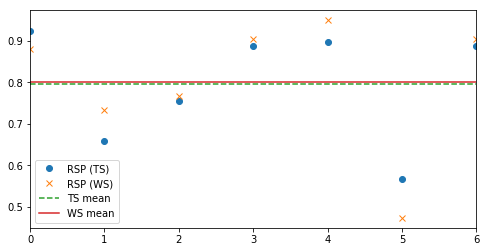

In [5]:
path = r'C:\Users\LCI_user\Documents\PhilipCiunkiewicz\Windstorm\SQUIRREL\Results'
files = os.listdir(path)
TS = []
WS = []

for file in files:
    if file.endswith('_TS.tif.csv'):
        TS.append(file)
    else:
        WS.append(file)

frames = []
for file in TS:
    fullpath = os.path.join(path,file)
    frames.append(pd.read_csv(fullpath,usecols=['RSP (Resolution Scaled Pearson-Correlation)',
                                                'RSE (Resolution Scaled Error)']))
df_TS = pd.concat(frames)
df_TS.columns = header=['RSP (TS)','RSE (TS)']

frames = []
for file in WS:
    fullpath = os.path.join(path,file)
    frames.append(pd.read_csv(fullpath,usecols=['RSP (Resolution Scaled Pearson-Correlation)',
                                                'RSE (Resolution Scaled Error)']))
df_WS = pd.concat(frames)
df_WS.columns = header=['RSP (WS)','RSE (WS)']

SQUIRREL = pd.concat([df_TS, df_WS], axis=1, join='inner')
SQUIRREL = SQUIRREL.reset_index(drop=True)

WS = [x.strip('RSP and RSE values ') for x in WS]
WS = [x.strip('_WS.tif.csv') for x in WS]
SQUIRREL['filename'] = WS
SQUIRREL

ax = SQUIRREL.plot(y=['RSP (TS)','RSP (WS)'],style=['o','x'])
_ = ax.plot([0,6],np.mean(SQUIRREL['RSP (TS)'])*np.ones(2),'--',label='TS mean')
_ = ax.plot([0,6],np.mean(SQUIRREL['RSP (WS)'])*np.ones(2),'-',label='WS mean')
_ = ax.legend()

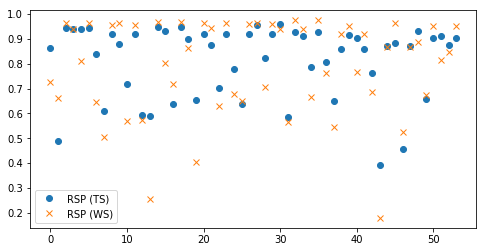

In [107]:
path = 'E:\PhilipCiunkiewicz\Windstorm\SQUIRREL\Results2'
files = os.listdir(path)
TS = []
WS = []

for file in files:
    if file.endswith('_TS.tif.csv'):
        TS.append(file)
    else:
        WS.append(file)

frames = []
for file in TS:
    fullpath = os.path.join(path,file)
    frames.append(pd.read_csv(fullpath,usecols=['RSP (Resolution Scaled Pearson-Correlation)',
                                                'RSE (Resolution Scaled Error)']))
df_TS = pd.concat(frames)
df_TS.columns = header=['RSP (TS)','RSE (TS)']

frames = []
for file in WS:
    fullpath = os.path.join(path,file)
    frames.append(pd.read_csv(fullpath,usecols=['RSP (Resolution Scaled Pearson-Correlation)',
                                                'RSE (Resolution Scaled Error)']))
df_WS = pd.concat(frames)
df_WS.columns = header=['RSP (WS)','RSE (WS)']

SQUIRREL = pd.concat([df_TS, df_WS], axis=1, join='inner')
SQUIRREL = SQUIRREL.reset_index(drop=True)

ax = SQUIRREL.plot(y=['RSP (TS)','RSP (WS)'],style=['o','x'])

0.879

0.8665

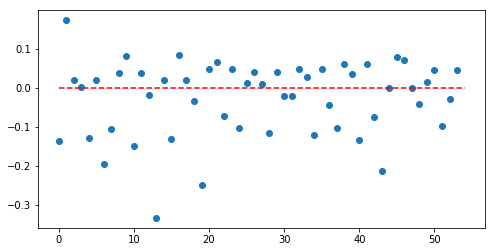

In [109]:
difference = SQUIRREL['RSP (WS)']-SQUIRREL['RSP (TS)']
plt.plot(difference,'o')
plt.plot([0,54],[0,0],'r--')
np.median(SQUIRREL['RSP (TS)'])
np.median(SQUIRREL['RSP (WS)'])